<a href="https://colab.research.google.com/github/Sandymyatnoe/Sandymyatnoe/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#1. make classification data

import sklearn

In [5]:
from sklearn.datasets import make_circles

#make 1000 samples

n_samples=1000

#create circles

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [6]:
len(X), len(y)

(1000, 1000)

In [7]:
print(f"First five samples of X:{X[:5]}")
print(f"First five samples of y:{y[:5]}")

First five samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y:[1 1 1 1 0]


In [8]:
#make dataframe of circle data

import pandas as pd

circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


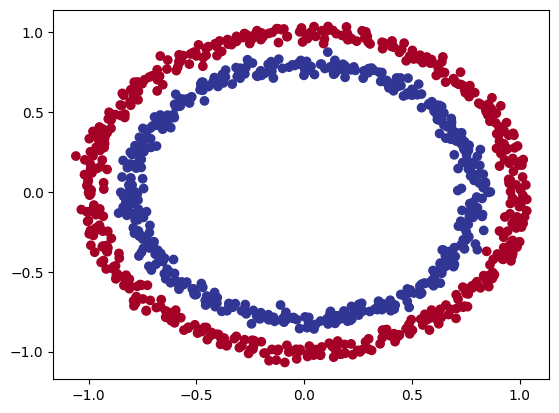

In [9]:
#visualization

import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [10]:
#check inputs and output

X.shape, y.shape

((1000, 2), (1000,))

In [11]:
X_sample=X[0]
y_sample=y[0]
X_sample, y_sample, X_sample.shape, y_sample.shape

(array([0.75424625, 0.23148074]), 1, (2,), ())

In [12]:
#turn data into tensor

import torch
torch.__version__

'2.3.1+cu121'

In [13]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [14]:
X =torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [16]:
#split data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [19]:
#Building a model

import torch
from torch import nn

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [20]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()


    self.layer_1=nn.Linear(in_features=2, out_features=5)
    self.layer_2=nn.Linear(in_features=5, out_features=1)


  def forward(self,x):
    return self.layer_2(self.layer_1(x))

model_0=CircleModel().to(device)
model_0



CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
device

'cpu'

In [22]:
next(model_0.parameters()).device

device(type='cpu')

In [23]:
#replace the model with nn.Sequential()


model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0409,  0.2047],
                      [-0.1299, -0.5524],
                      [ 0.5101, -0.6270],
                      [ 0.1623, -0.0640],
                      [ 0.2435, -0.1670]])),
             ('0.bias', tensor([-0.4339, -0.5760, -0.5020, -0.4551,  0.0401])),
             ('1.weight',
              tensor([[-0.4340, -0.0308, -0.4362, -0.3386,  0.3981]])),
             ('1.bias', tensor([0.3672]))])

In [25]:
#make prediction

untrained_preds=model_0(X_test.to(device))
untrained_preds[:10], len(untrained_preds), len(X_test), X_test.shape

(tensor([[1.1423],
         [1.1100],
         [1.0495],
         [1.1694],
         [0.7674],
         [0.7499],
         [0.8823],
         [0.7972],
         [1.0616],
         [1.1047]], grad_fn=<SliceBackward0>),
 200,
 200,
 torch.Size([200, 2]))

In [26]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [27]:
#setup loss and optimizer

loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [28]:
#calculate accuracy

def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

#Training loop

In [29]:
#view the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[1.1423],
        [1.1100],
        [1.0495],
        [1.1694],
        [0.7674]])

In [30]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [31]:
#use sigmoid activation fun

y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.7581],
        [0.7521],
        [0.7407],
        [0.7630],
        [0.6830]])

In [32]:
y_preds=torch.round(y_pred_probs)
y_preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [33]:
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

In [34]:
torch.eq(y_pred_labels.squeeze(), y_preds.squeeze())

tensor([True, True, True, True, True])

In [35]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

#training and testing


In [36]:
#we need 5 steps

torch.manual_seed(42)

epochs=100



X_train, y_train=X_train.to(device), y_train.to(device)
X_test, y_test=X_test.to(device), y_test.to(device)


for epoch in range(epochs):

  model_0.train()

  y_logits=model_0(X_train).squeeze()

  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)

  acc=accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing

  model_0.eval()
  with torch.inference_mode():

    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits, y_test)

    test_acc=accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch%10==0:

    print(f"Epoch: {epoch} | Loss: {loss:5f} | Test loss: {test_loss:5f} | Test accuracy: {test_acc}")

Epoch: 0 | Loss: 0.806409 | Test loss: 0.796791 | Test accuracy: 50.0
Epoch: 10 | Loss: 0.728240 | Test loss: 0.724287 | Test accuracy: 50.0
Epoch: 20 | Loss: 0.704991 | Test loss: 0.702330 | Test accuracy: 50.0
Epoch: 30 | Loss: 0.697630 | Test loss: 0.695317 | Test accuracy: 50.0
Epoch: 40 | Loss: 0.695177 | Test loss: 0.693031 | Test accuracy: 50.0
Epoch: 50 | Loss: 0.694297 | Test loss: 0.692306 | Test accuracy: 60.0
Epoch: 60 | Loss: 0.693936 | Test loss: 0.692116 | Test accuracy: 51.5
Epoch: 70 | Loss: 0.693753 | Test loss: 0.692119 | Test accuracy: 51.5
Epoch: 80 | Loss: 0.693638 | Test loss: 0.692192 | Test accuracy: 52.0
Epoch: 90 | Loss: 0.693552 | Test loss: 0.692292 | Test accuracy: 50.5


In [37]:
#visualize


import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("It already exists.")

else:
  print("Please,download.")

  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Please,download.


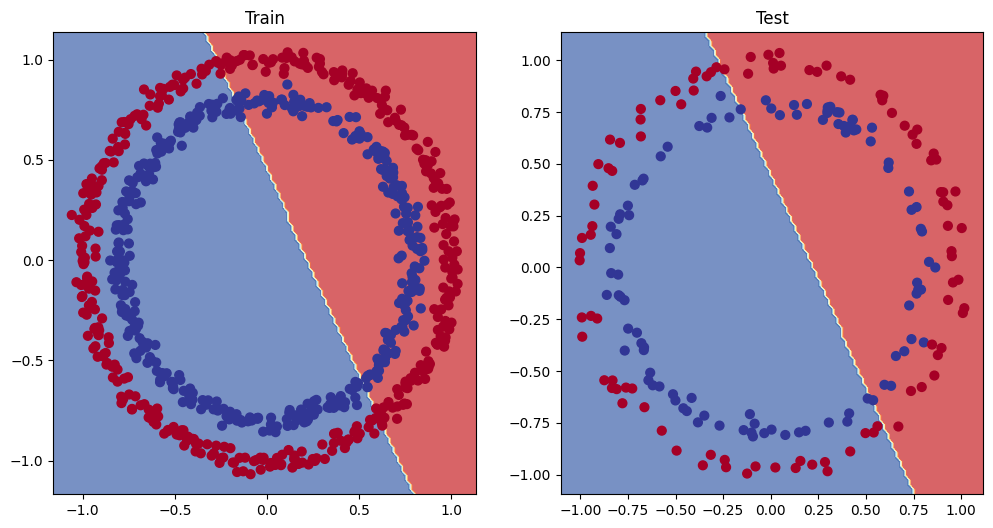

In [38]:
#plot decision boundary

plt.figure(figsize=(12,6))


plt.subplot(1,2,1)

plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

#imporving model

In [39]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0091,  0.1837],
                      [-0.1169, -0.5403],
                      [ 0.4806, -0.6460],
                      [ 0.1413, -0.0769],
                      [ 0.2855, -0.1359]])),
             ('0.bias', tensor([-0.2842, -0.6106, -0.3605, -0.3496, -0.1321])),
             ('1.weight',
              tensor([[-0.2668,  0.1642, -0.2526, -0.1603,  0.4317]])),
             ('1.bias', tensor([-0.0563]))])

In [40]:
#new model


class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10, out_features=10)
    self.layer_3=nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
    #z=self.layer_1(x)
    #z=self.layer_2(z)
    #z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))


model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [42]:
#create loss

loss_fn=nn.BCEWithLogitsLoss()


optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [43]:
torch.manual_seed(42)

epochs=1000

X_train, y_train=X_train.to(device), y_train.to(device)
X_test, y_test=X_test.to(device), y_test.to(device)


for epoch in range(epochs):

  model_1.train()

  y_logits=model_1(X_train).squeeze()

  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)

  acc=accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing

  model_1.eval()
  with torch.inference_mode():

    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits, y_test)

    test_acc=accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch%100==0:

    print(f"Epoch: {epoch} | Loss: {loss:5f}| acc:{acc:2f} | Test loss: {test_loss:5f} | Test accuracy: {test_acc}")

Epoch: 0 | Loss: 0.693955| acc:50.875000 | Test loss: 0.692615 | Test accuracy: 51.0
Epoch: 100 | Loss: 0.693048| acc:50.375000 | Test loss: 0.693790 | Test accuracy: 48.0
Epoch: 200 | Loss: 0.692986| acc:51.125000 | Test loss: 0.694373 | Test accuracy: 46.0
Epoch: 300 | Loss: 0.692981| acc:51.625000 | Test loss: 0.694577 | Test accuracy: 45.0
Epoch: 400 | Loss: 0.692980| acc:51.125000 | Test loss: 0.694645 | Test accuracy: 46.0
Epoch: 500 | Loss: 0.692980| acc:51.000000 | Test loss: 0.694668 | Test accuracy: 46.0
Epoch: 600 | Loss: 0.692980| acc:51.000000 | Test loss: 0.694676 | Test accuracy: 46.0
Epoch: 700 | Loss: 0.692980| acc:51.000000 | Test loss: 0.694678 | Test accuracy: 46.0
Epoch: 800 | Loss: 0.692980| acc:51.000000 | Test loss: 0.694679 | Test accuracy: 46.0
Epoch: 900 | Loss: 0.692980| acc:51.000000 | Test loss: 0.694679 | Test accuracy: 46.0


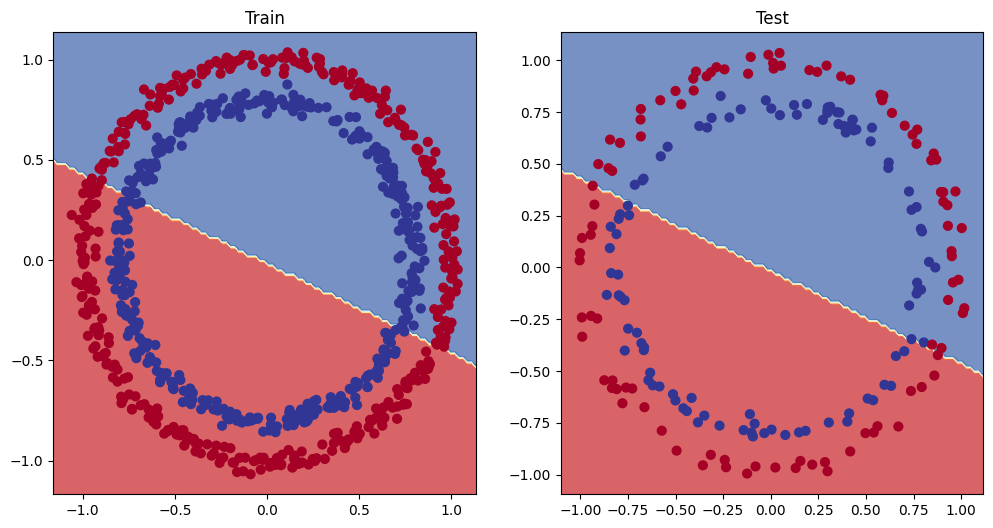

In [44]:
plt.figure(figsize=(12,6))


plt.subplot(1,2,1)

plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

#Nonlinearlity

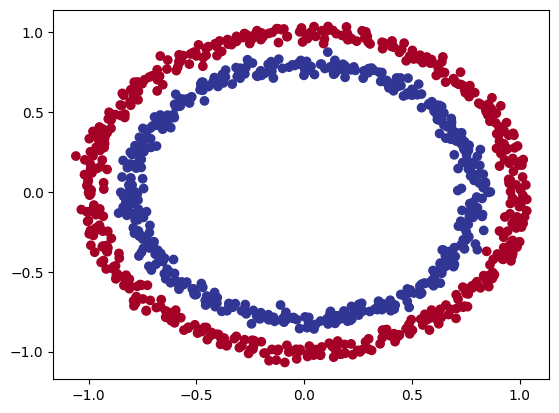

In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


n_samples=1000

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)


plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [46]:
import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [47]:
#model nolinear

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=10)
    self.layer2=nn.Linear(in_features=10, out_features=10)
    self.layer3=nn.Linear(in_features=10, out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [48]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_3.parameters(),
                          lr=0.1)

In [49]:
torch.manual_seed(42)


X_train, y_train=X_train.to(device), y_train.to(device)
X_test, y_test=X_test.to(device), y_test.to(device)

epochs=1000

for epoch in range(epochs):

  model_3.train()

  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits, y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()

  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits, y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)


  if epoch%100==0:
    print(f"Epoch:{epoch}| Loss: {loss:.4f}| Test Loss:{test_loss:.2f}| Test acc:{test_acc:.2f}")





Epoch:0| Loss: 0.6929| Test Loss:0.69| Test acc:50.00
Epoch:100| Loss: 0.6912| Test Loss:0.69| Test acc:52.50
Epoch:200| Loss: 0.6898| Test Loss:0.69| Test acc:55.00
Epoch:300| Loss: 0.6879| Test Loss:0.69| Test acc:56.00
Epoch:400| Loss: 0.6852| Test Loss:0.68| Test acc:56.50
Epoch:500| Loss: 0.6810| Test Loss:0.68| Test acc:56.50
Epoch:600| Loss: 0.6751| Test Loss:0.67| Test acc:56.00
Epoch:700| Loss: 0.6666| Test Loss:0.66| Test acc:59.00
Epoch:800| Loss: 0.6516| Test Loss:0.65| Test acc:67.50
Epoch:900| Loss: 0.6236| Test Loss:0.62| Test acc:79.00


In [50]:
model_3.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984])),
             ('layer2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01,  5.6581e-02,  5.3486e-01, -1.9274e-

In [51]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

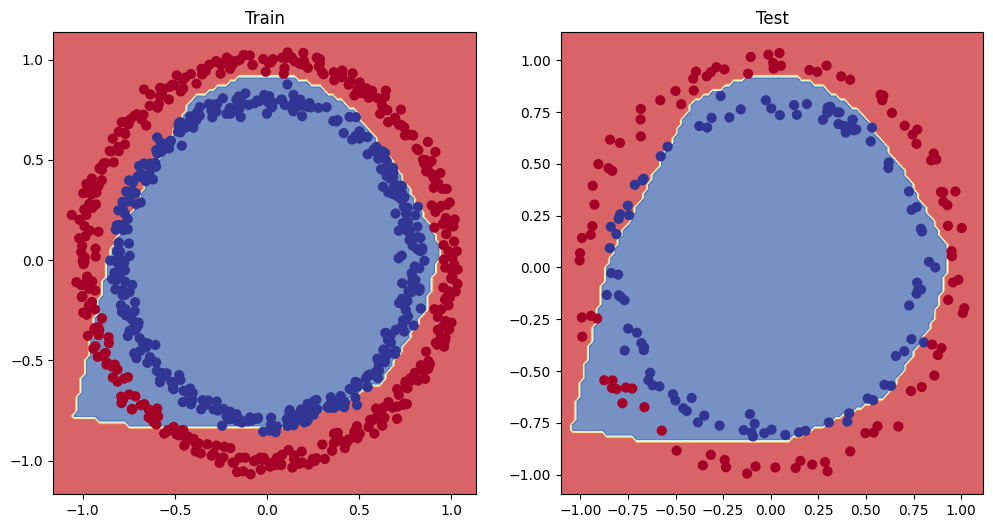

In [52]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [53]:
#create a tensor


A=torch.arange(-10,10,1, dtype=torch.float32)
A, A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

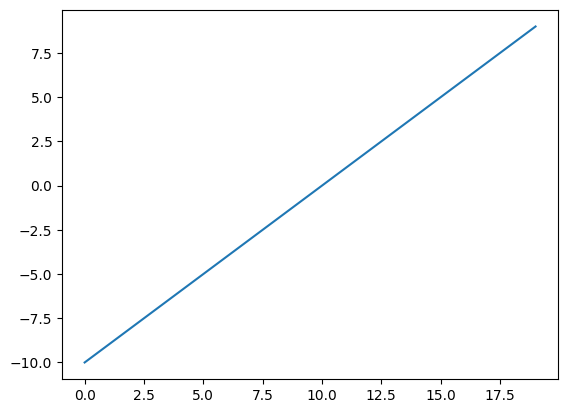

In [54]:
plt.plot(A)

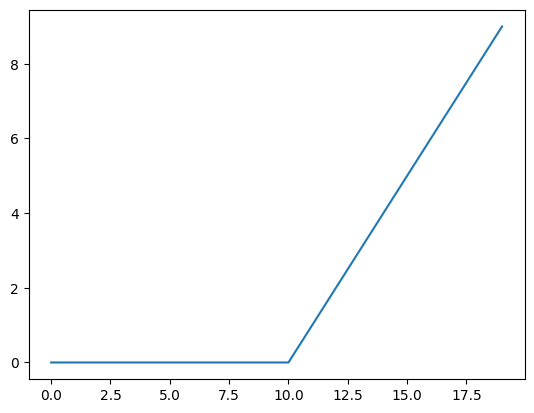

In [55]:
plt.plot(torch.relu(A))

In [56]:
import torch
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [57]:
n_samples=1000
X,y=make_circles(n_samples, noise=0.03, random_state=42)
X[:5], y[:5], len(X), len(y)

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]),
 1000,
 1000)

In [58]:
import pandas as pd
circle=pd.DataFrame({"X1":X[:,0],
                     "X2":X[:,1],
                     "y":y})

circle.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


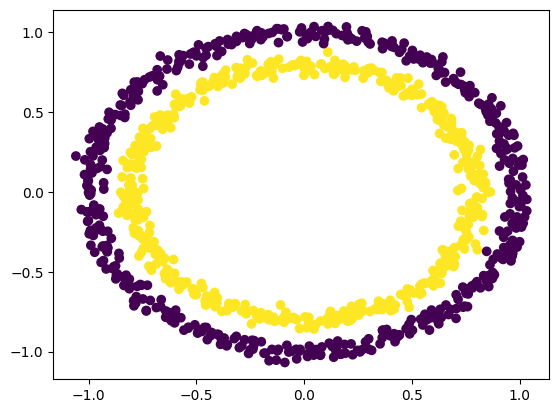

In [59]:
plt.scatter(x=X[:,0],y=X[:,1], c=y)

In [60]:
X =torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [61]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=True)

In [62]:
len(X_train), len(y_train), len(X_test), len(y_test)

(750, 750, 250, 250)

In [63]:
class Cmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=100)
    self.layer2=nn.Linear(in_features=100, out_features=50)
    self.layer3=nn.Linear(in_features=50, out_features=20)
    self.layer4=nn.Linear(in_features=20, out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))


model=Cmodel()
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230],
                      [ 0.1900, -0.1918],
                      [ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
   

In [64]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(),
                           lr=0.1)

In [65]:
epochs=3000




for epoch in range(epochs):
  model.train()

  y_pred=model(X_train).squeeze()

  loss=loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_preds=model(X_test).squeeze()
    test_losses=loss_fn(test_preds, y_test)

  if epoch%100==0:
    print(f"Epoch: {epoch}| Loss:{loss}| Test loss:{test_losses}")

Epoch: 0| Loss:0.6924077272415161| Test loss:0.6927362084388733
Epoch: 100| Loss:0.6895948648452759| Test loss:0.6906743049621582
Epoch: 200| Loss:0.6850923895835876| Test loss:0.686509370803833
Epoch: 300| Loss:0.671574056148529| Test loss:0.6745689511299133
Epoch: 400| Loss:0.6107662320137024| Test loss:0.6161948442459106
Epoch: 500| Loss:0.4833493232727051| Test loss:0.5550947785377502
Epoch: 600| Loss:0.3747161030769348| Test loss:0.4361874759197235
Epoch: 700| Loss:0.07036832720041275| Test loss:0.06904454529285431
Epoch: 800| Loss:0.02731776423752308| Test loss:0.025730213150382042
Epoch: 900| Loss:0.015848716720938683| Test loss:0.014839623123407364
Epoch: 1000| Loss:0.010932188481092453| Test loss:0.010363816283643246
Epoch: 1100| Loss:0.008247253485023975| Test loss:0.008019151166081429
Epoch: 1200| Loss:0.006573747843503952| Test loss:0.0065882508642971516
Epoch: 1300| Loss:0.005439739674329758| Test loss:0.005678579676896334
Epoch: 1400| Loss:0.004621886182576418| Test loss:

In [66]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.8433,  0.8342],
                      [-0.2489,  0.9600],
                      [-0.1565,  0.1724],
                      [-0.3710,  0.5276],
                      [ 0.8067, -0.6329],
                      [ 0.8350,  0.2126],
                      [ 0.7701,  0.1779],
                      [ 0.3410, -0.0998],
                      [ 0.7169,  0.1538],
                      [-0.2841,  0.1550],
                      [-0.3125, -0.1138],
                      [-0.4294,  0.8396],
                      [-0.5500, -0.3213],
                      [-0.2758, -0.5685],
                      [ 0.1033, -1.0446],
                      [ 0.5091, -0.4606],
                      [ 0.7830,  0.2079],
                      [-0.3630,  0.6386],
                      [ 0.1085,  0.7694],
                      [ 0.0773, -0.2230],
                      [ 0.1900, -0.1918],
                      [ 0.3636,  0.9268],
                      [ 0.4821, -0.3863],
   

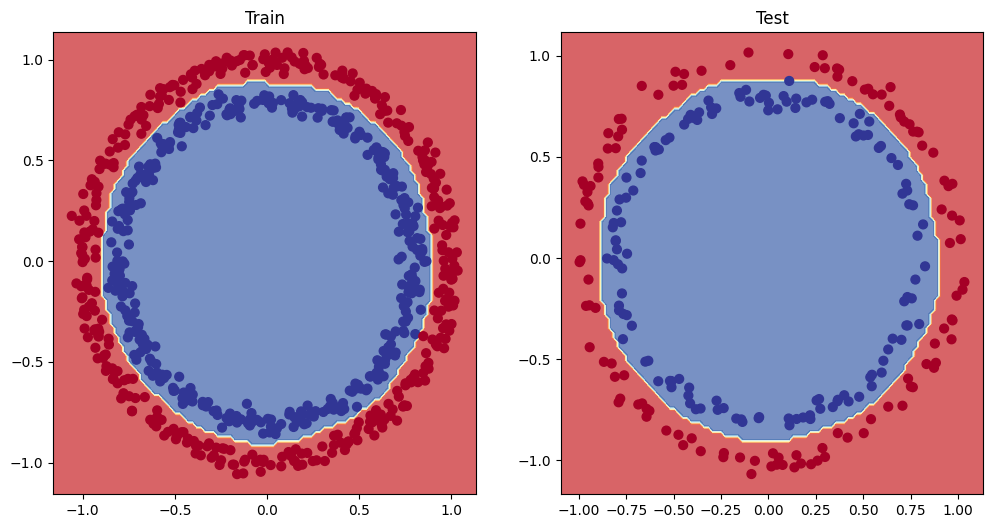

In [67]:
plt.figure(figsize=(12,6))


plt.subplot(1,2,1)

plt.title("Train")
plot_decision_boundary(model, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [68]:
#multiclass classification


import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split




In [69]:
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42


X_blob, y_blob=make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5,
                          random_state=RANDOM_SEED)

X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)


X_blob_train, X_blob_test, y_blob_train, y_blob_test=train_test_split(X_blob,
                                                                      y_blob,
                                                                      test_size=0.2,
                                                                      random_state=RANDOM_SEED)




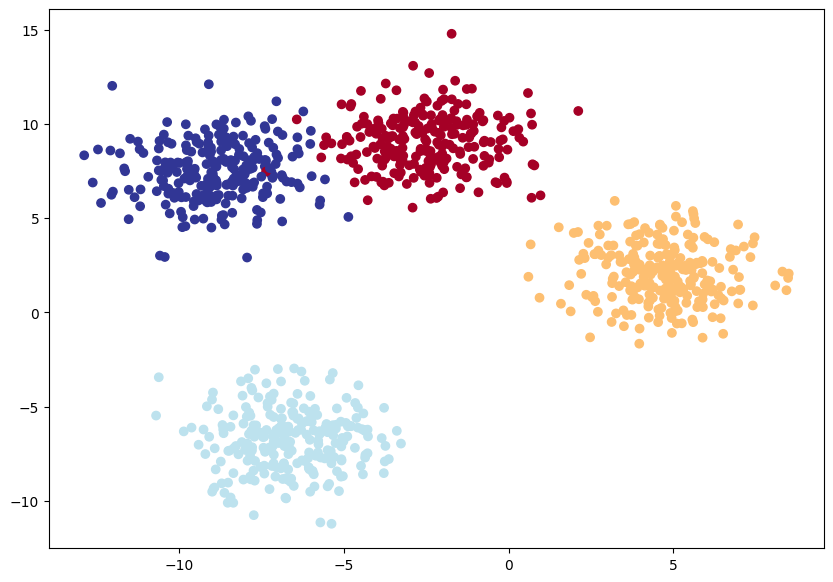

In [70]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [71]:
#multiclass classification model


device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [72]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)


model_4=BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)

model_4



BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [73]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [74]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [75]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_4.parameters(),
                          lr=0.1)

In [76]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test.to(device))


y_logits[:5]

tensor([[ 1.2264, -0.1021,  0.7551, -0.0413],
        [ 0.4028, -0.7703,  1.0735, -1.2032],
        [ 1.0650,  0.7033, -0.8017,  0.5189],
        [ 0.7739, -0.1178,  0.4106,  0.2480],
        [ 1.2430, -0.4852,  1.3974, -1.0920]])

In [77]:
y_pred_probs=torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[0.4607, 0.1220, 0.2876, 0.1297],
        [0.2885, 0.0893, 0.5643, 0.0579],
        [0.4115, 0.2866, 0.0636, 0.2383],
        [0.3709, 0.1520, 0.2579, 0.2192],
        [0.4096, 0.0727, 0.4780, 0.0397]])

In [78]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [79]:
torch.argmax(y_pred_probs[0])

tensor(0)

In [80]:
y_preds=torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0,
        0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0,
        2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2,
        0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0,
        0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0,
        0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2,
        0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
        0, 2, 0, 2, 2, 0, 0, 0])

In [81]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [82]:
next(model_4.parameters()).device

device(type='cpu')

In [83]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

X_blob_train, y_blob_train=X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test=X_blob_test.to(device), y_blob_test.to(device)


for epoch in range(epochs):

  model_4.train()

  y_logits=model_4(X_blob_train).squeeze()
  y_pred=torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss=loss_fn(y_logits, y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(X_blob_test).squeeze()
    test_pred=torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss=loss_fn(test_logits, y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,
                         y_pred=test_pred)

  if epoch%10==0:
    print(f"Epoch:{epoch}|Loss:{loss:.4f}|Acc:{acc:.2f}% | Test loss:{test_loss:.4f}| Test acc: {test_acc:.2f}%")


Epoch:0|Loss:2.0940|Acc:0.12% | Test loss:1.5645| Test acc: 24.50%
Epoch:10|Loss:0.9700|Acc:47.25% | Test loss:0.8930| Test acc: 52.00%
Epoch:20|Loss:0.4768|Acc:90.88% | Test loss:0.4415| Test acc: 94.50%
Epoch:30|Loss:0.2024|Acc:99.12% | Test loss:0.1806| Test acc: 99.50%
Epoch:40|Loss:0.1019|Acc:99.12% | Test loss:0.0878| Test acc: 99.50%
Epoch:50|Loss:0.0698|Acc:99.12% | Test loss:0.0583| Test acc: 99.50%
Epoch:60|Loss:0.0554|Acc:99.12% | Test loss:0.0449| Test acc: 99.50%
Epoch:70|Loss:0.0474|Acc:99.12% | Test loss:0.0374| Test acc: 99.50%
Epoch:80|Loss:0.0424|Acc:99.12% | Test loss:0.0326| Test acc: 99.50%
Epoch:90|Loss:0.0390|Acc:99.12% | Test loss:0.0292| Test acc: 99.50%


In [84]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test)

y_logits[:10]

tensor([[ 3.6272,  9.5473, -3.9381, -0.2050],
        [ 0.3426, -5.4552, -1.9402,  5.2424],
        [-6.5348, -3.3181,  4.8952, -0.2795],
        [ 1.0070,  5.7184, -1.3127, -0.3953],
        [11.1801,  6.1103, -9.0412,  2.8107],
        [-0.1960, -6.8450, -2.0151,  6.2531],
        [-4.9209, -2.3827,  3.8526, -0.2965],
        [ 9.7386,  2.2702, -7.3433,  2.9057],
        [-9.3486, -5.5135,  6.5059,  0.2836],
        [10.5787,  3.5762, -8.0144,  2.7245]])

In [85]:
y_pred_probs=torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.6775e-03, 9.9726e-01, 1.3873e-06, 5.8004e-05],
        [7.3868e-03, 2.2414e-05, 7.5345e-04, 9.9184e-01],
        [1.0800e-05, 2.6943e-04, 9.9410e-01, 5.6244e-03],
        [8.8854e-03, 9.8806e-01, 8.7346e-04, 2.1859e-03],
        [9.9353e-01, 6.2433e-03, 1.6413e-09, 2.3037e-04],
        [1.5790e-03, 2.0453e-06, 2.5607e-04, 9.9816e-01],
        [1.5207e-04, 1.9246e-03, 9.8242e-01, 1.5501e-02],
        [9.9835e-01, 5.6989e-04, 3.8081e-08, 1.0759e-03],
        [1.2990e-07, 6.0137e-06, 9.9801e-01, 1.9806e-03],
        [9.9870e-01, 9.0848e-04, 8.4054e-09, 3.8764e-04]])

In [86]:
y_preds=torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [87]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

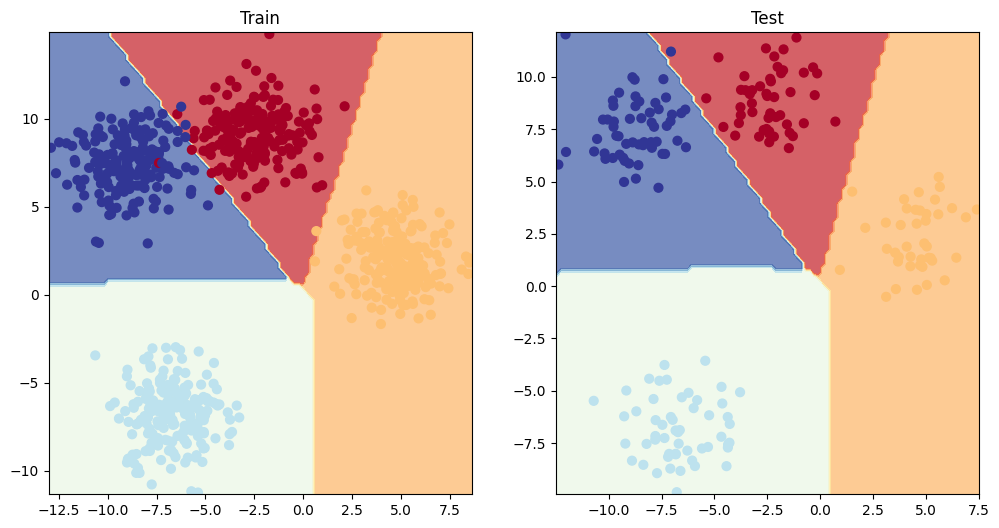

In [88]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [89]:
!pip install torchmetrics